## Merging all worksheets and removing na values

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
my_dict = {
  "USGG30YR" : "US Generic Govt 30 Yr",

  "USGG10YR" : "US Generic Govt 10 Yr",

  "USGG2YR" : "US Generic Govt 2 Yr",

  "GDBR10" : "GERMANY GOVT BND 10 YR DBR",

  "GDBR30" : "GERMANY GOVT BND 30 YR DBR",

  "GDBR2" : "GERMANY GOVT BND 2 YR BKO",

  "GUKG10" : "UK Gilts 10 Yr",

  "XAU" : "Gold",

  "XBTUSD" : "Bitcoin/US DOLLAR",

  "XAG" : "Silver",

  "ARFOWE" : "Argentina Wheat FOB Argentinian Ports SPOT",

  "SPGSWH" : "S&P GSCI Wheat Index Spot CME",

  "BCOMGRSP" : "Bloomberg Grains Spot Subindex",

  "MXWD0EN" : "MSCI ACWI Energy Sector Index",

  "MXWO0FN" : "MSCI World Financials Index",

  "MXWD0AL" : "MSCI ACWI Airlines Index",

  "MXWO" : "MSCI World Index",

  "MXWO0OG" : "MSCI World Oil Gas & Consumable Fuels Index",

  "MXWO0CS" : "MSCI World Consumer Staples Index",

  "MXWO0RE" : "MSCI World Real Estate Index",

  "MXWD0AD" : "MSCI ACWI Aerospace & Defense Index",

  "SPX" : "S&P 500 INDEX",

  "USDUAH" : "US DOLLAR/UKRAINE HRYVNIA",

  "USDEUR" : "US DOLLAR/EURO",

  "USDJPY" : "US DOLLAR/JAPANESE YEN",

  "USDCAD" : "US DOLLAR/CANADIAN DOLLAR",

  "USDTRY" : "US DOLLAR/TURKISH LIRA",

  "USDGBP" : "US DOLLAR/BRITISH POUND",

  "NGUSHHUB" : "Henry Hub Natural Gas Spot Price",

  "EUCRBRDT" : "European Crude Dated Brent Spot",

  "USCRWTIC" : "US Crude Oil WTI Cushing OK Spot",

  "TTFG1MON" : "Netherlands TTF Natural Gas Forward Month 1",

  "NBPG1MON" : "UK NBP Natural Gas Forward M1",

  "NGCDAECS" : "One Month Forward Natural Gas Spot Price/AECO C Hub CAD",

  "USGGBE10" : "US Breakeven 10 Year",

  "USGGBE05" : "US Breakeven 5 Year",

  "DEGGBE10" : "Germany Breakeven 10 Year",

  "USGGBE02" : "US Breakeven 2 Year",

  "UKIMII05" : "UK Instantaneous Implied Inflation Forward Curve 5 Year",
}

In [3]:
my_dict.keys()

dict_keys(['USGG30YR', 'USGG10YR', 'USGG2YR', 'GDBR10', 'GDBR30', 'GDBR2', 'GUKG10', 'XAU', 'XBTUSD', 'XAG', 'ARFOWE', 'SPGSWH', 'BCOMGRSP', 'MXWD0EN', 'MXWO0FN', 'MXWD0AL', 'MXWO', 'MXWO0OG', 'MXWO0CS', 'MXWO0RE', 'MXWD0AD', 'SPX', 'USDUAH', 'USDEUR', 'USDJPY', 'USDCAD', 'USDTRY', 'USDGBP', 'NGUSHHUB', 'EUCRBRDT', 'USCRWTIC', 'TTFG1MON', 'NBPG1MON', 'NGCDAECS', 'USGGBE10', 'USGGBE05', 'DEGGBE10', 'USGGBE02', 'UKIMII05'])

In [4]:
df0 = pd.read_excel("Moody's Economic Data.xlsx", 0)
df1 = pd.read_excel("Moody's Economic Data.xlsx", 1)
df2 = pd.read_excel("Moody's Economic Data.xlsx", 2)
df3 = pd.read_excel("Moody's Economic Data.xlsx", 3)
df4 = pd.read_excel("Moody's Economic Data.xlsx", 4)
df5 = pd.read_excel("Moody's Economic Data.xlsx", 5)

In [5]:
df0 = df0.iloc[1: , :]
df1 = df1.iloc[1: , :]
df2 = df2.iloc[1: , :]
df3 = df3.iloc[1: , :]
df4 = df4.iloc[1: , :]
df5 = df5.iloc[1: , :]

In [6]:
df=pd.merge(df0,df1, how='inner')
df=pd.merge(df,df2, how='inner')
df=pd.merge(df,df3, how='inner')
df=pd.merge(df,df4, how='inner')
df=pd.merge(df,df5, how='inner')

In [7]:
df = df.drop("Unnamed: 1", axis = 1)

In [8]:
df.dropna(inplace = True)
df.isnull().sum().sum() #so there are no null values left now

0

In [9]:
for col in df.columns:
  if col != "Date":
    df[col] = df[col].astype(str).astype(float)

In [10]:
len(df)

607

In [11]:
len(df.columns)

40

In [12]:
len(my_dict.keys())

39

In [13]:
from datetime import datetime

timestamp = 1586507536
dt_object = datetime.fromtimestamp(timestamp)
type(dt_object)

datetime.datetime

In [14]:
# df.Date = df.Date.apply(lambda x: x.datetime())
df.Date = df.Date.apply(lambda x: datetime.fromtimestamp(x.timestamp()))

## Pre-war, In-war and Post-war and plotting heat_maps

In [15]:
war_start = pd.Timestamp('2022-02-15T00:00:00')
war_end = pd.Timestamp('2022-03-08T00:00:00')

In [16]:
pre_war_period = df[df["Date"] < war_start].reset_index()

In [17]:
post_war_period = df[df["Date"] > war_end].reset_index()

In [18]:
in_war_period = df[df["Date"] <= war_end][df["Date"] >= war_start].reset_index()

C:\Users\justi\AppData\Local\Temp/ipykernel_16768/2648445610.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  in_war_period = df[df["Date"] <= war_end][df["Date"] >= war_start].reset_index()


<AxesSubplot:>

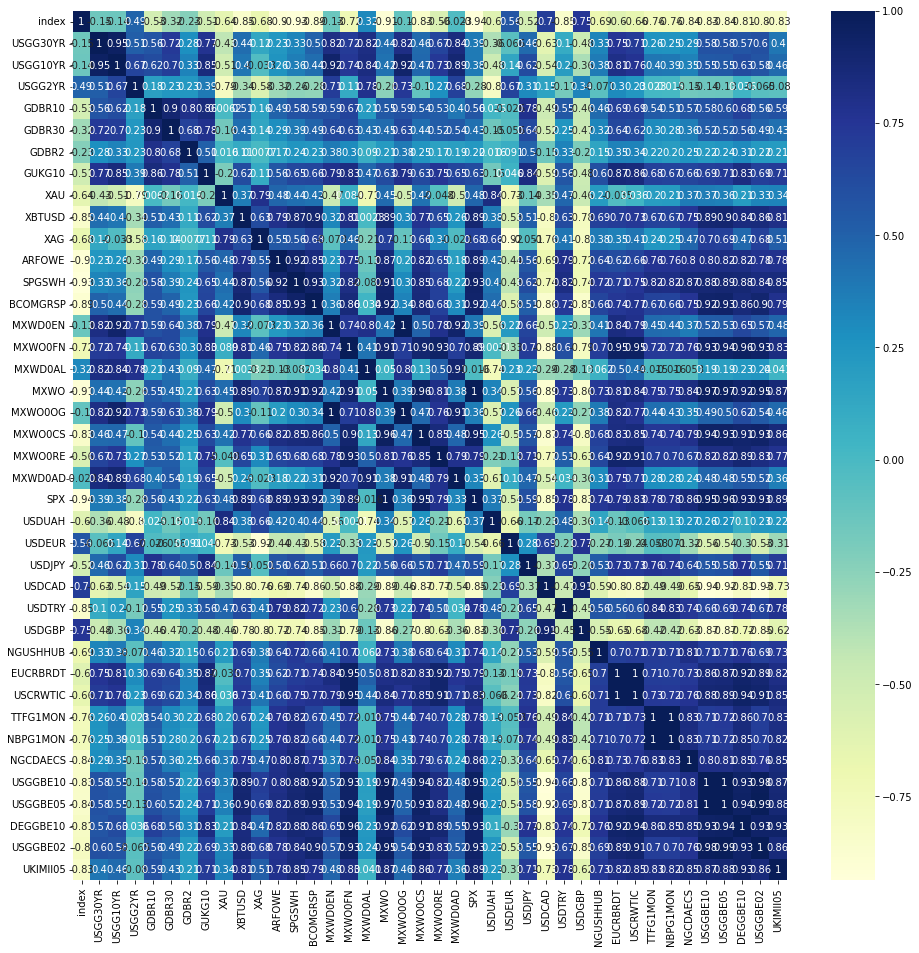

In [19]:
plt.figure(figsize = (16,16))
sns.heatmap(pre_war_period.corr(), cmap="YlGnBu", annot=True)

<AxesSubplot:>

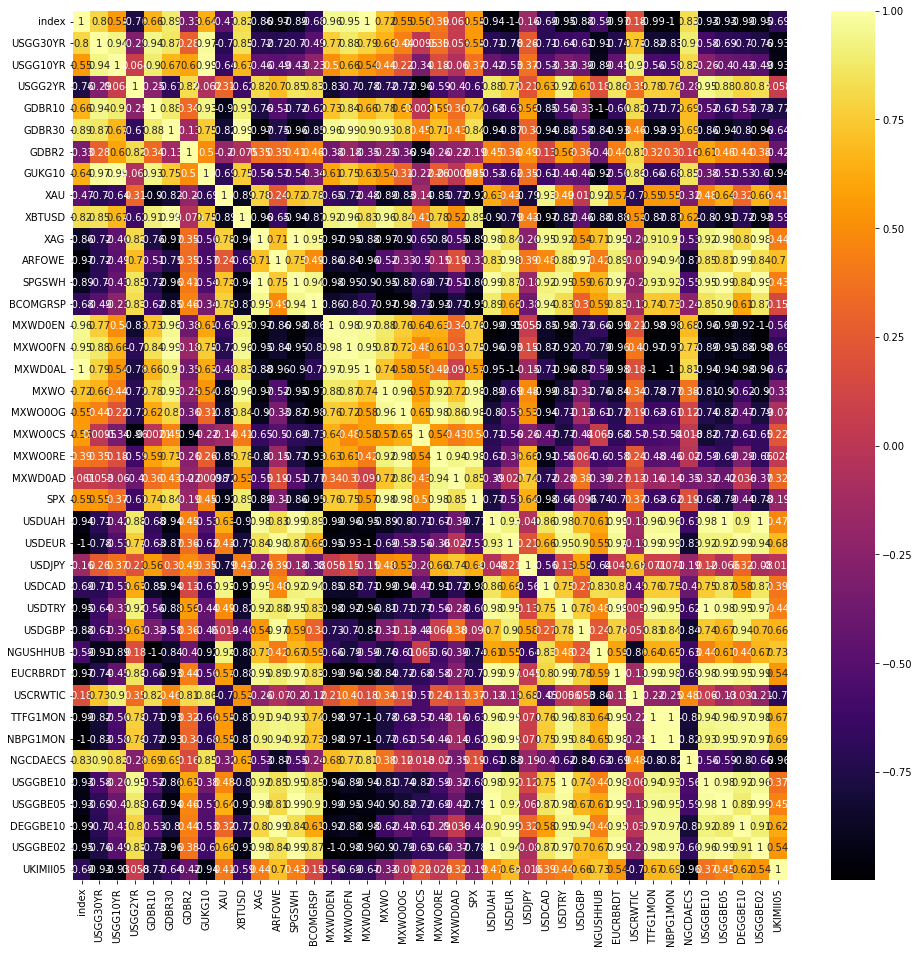

In [20]:
plt.figure(figsize = (16,16))
sns.heatmap(in_war_period.corr(), cmap="inferno", annot=True)

<AxesSubplot:>

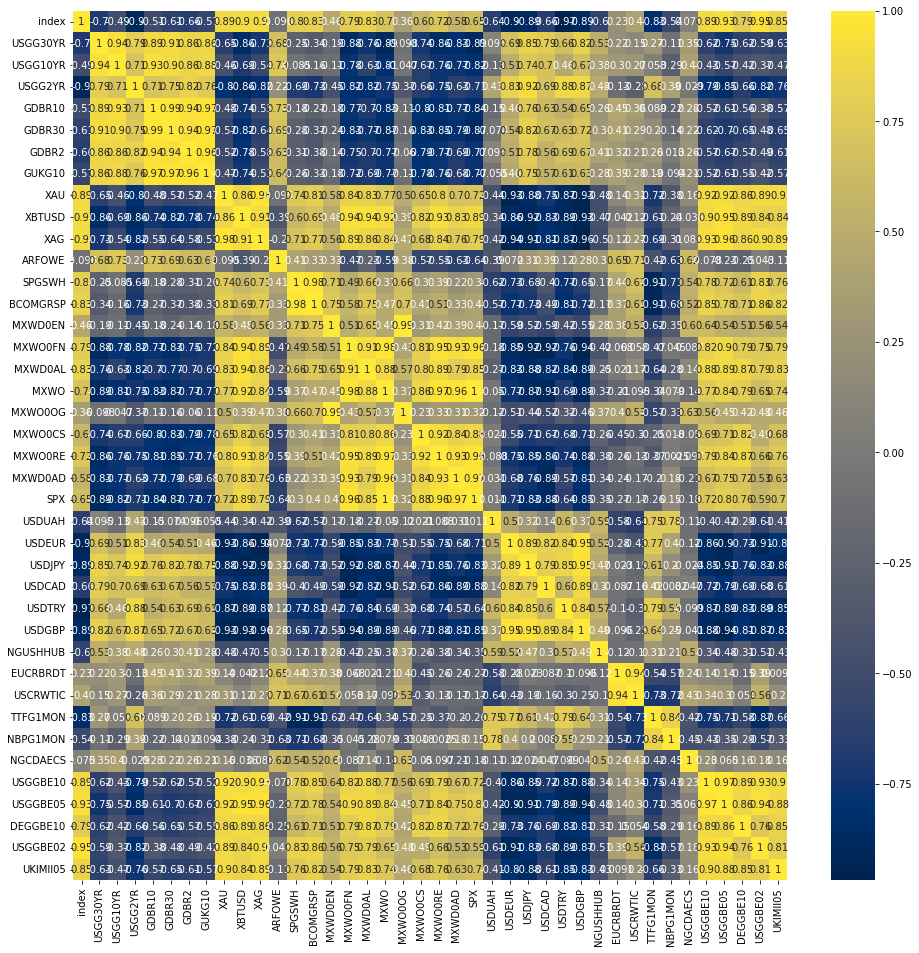

In [21]:
plt.figure(figsize = (16,16))
sns.heatmap(post_war_period.corr(), cmap="cividis", annot=True)

## Significant Changes in correlation coefficients

In [22]:
dict_correlation_pre = pre_war_period.drop("Date", axis = 1).corr().unstack().to_dict()
len(dict_correlation_pre.keys())

1600

In [23]:
dict_correlation_in = in_war_period.drop("Date", axis = 1).corr().unstack().to_dict()
len(dict_correlation_in.keys())

1600

In [24]:
dict_correlation_post = post_war_period.drop("Date", axis = 1).corr().unstack().to_dict()
len(dict_correlation_post.keys())

1600

In [25]:
from scipy.stats.stats import pearsonr

In [26]:
def check_for(war_period, key):
    print("in here for key", key[0], key[1])
    x_temp = list(war_period[key[0]])
    y_temp = list(war_period[key[1]])
    temp_corr = pearsonr(x_temp, y_temp)[0]
    temp_p_value = pearsonr(x_temp, y_temp)[1]
    print(temp_corr)
    if temp_p_value >= 0.05:
        return True
    return False

In [27]:
pre_in_dict = {}
in_post_dict = {}
pre_post_dict = {}
times = 0
for key in dict_correlation_post.keys():
    if key[0] == key[1]:
        continue
    should_we_continue = check_for(pre_war_period, key)
    if should_we_continue == True:
        continue
    should_we_continue = check_for(in_war_period, key)
    if should_we_continue == True:
        continue
    should_we_continue = check_for(post_war_period, key)
    if should_we_continue == True:
        continue

    x = dict_correlation_pre[key]
    y = dict_correlation_in[key]
    z = dict_correlation_post[key]
    pre_in = (y-x)*100
    pre_in = round(pre_in, 2)
    pre_in_dict[key] = pre_in

    in_post = (z-y)*100
    in_post = round(in_post, 2)
    in_post_dict[key] = (in_post)

    pre_post = (z-x)*100
    pre_post = round(pre_post, 2)
    pre_post_dict[key] = (pre_post)

in here for key index USGG30YR
-0.14680033841374673
in here for key index USGG30YR
0.8014563086011108
in here for key index USGG10YR
-0.1392036699441934
in here for key index USGG10YR
0.5482715399119229
in here for key index USGG2YR
0.48740128287809514
in here for key index USGG2YR
-0.7636600702645702
in here for key index GDBR10
-0.5288303122901744
in here for key index GDBR10
0.6632833456776199
in here for key index GDBR30
-0.319492206669958
in here for key index GDBR30
0.8906216730894898
in here for key index GDBR2
-0.2334818014954711
in here for key index GDBR2
-0.3341739238461402
in here for key index GUKG10
-0.5107332180141978
in here for key index GUKG10
0.6419561279882993
in here for key index XAU
-0.6390797357753542
in here for key index XAU
-0.4698850649170617
in here for key index XBTUSD
-0.852999535156339
in here for key index XBTUSD
0.821112970124618
in here for key index XAG
-0.675579033976526
in here for key index XAG
-0.8635747749008547
in here for key index ARFOWE
-0.9

In [33]:
len(pre_in_dict) #keys after applying the above filter
len(pre_post_dict)

186

In [29]:
def get_list_of_top_changes(temp_dict):
    return sorted(temp_dict, key=lambda dict_key: abs(temp_dict[dict_key]), reverse=True)[0:40]

In [30]:
lst_keys = get_list_of_top_changes(pre_in_dict)
i = 0
last = -1000000

# Changes for pre_war to in_war period
for key in lst_keys:
    i+=1
    if pre_post_dict[key] == last:
        continue
    else:
        last = pre_post_dict[key]
    try:
        print("(", my_dict[key[0]],":", my_dict[key[1]], ") --->", pre_in_dict[key], "% change where initial value was", round(dict_correlation_pre[key],2), "and final value was", round(dict_correlation_in[key], 2))
        print()
    except:
        continue

( MSCI World Financials Index : US Breakeven 2 Year ) ---> -191.29 % change where initial value was 0.93 and final value was -0.98

( Bloomberg Grains Spot Subindex : MSCI World Index ) ---> -189.46 % change where initial value was 0.92 and final value was -0.97

( MSCI World Financials Index : US Breakeven 5 Year ) ---> -189.08 % change where initial value was 0.94 and final value was -0.95

( Bloomberg Grains Spot Subindex : S&P 500 INDEX ) ---> -186.91 % change where initial value was 0.92 and final value was -0.95

( MSCI ACWI Energy Sector Index : European Crude Dated Brent Spot ) ---> -183.34 % change where initial value was 0.84 and final value was -0.99

( S&P GSCI Wheat Index Spot CME : MSCI World Financials Index ) ---> -176.95 % change where initial value was 0.82 and final value was -0.95

( Argentina Wheat FOB Argentinian Ports SPOT : US DOLLAR/BRITISH POUND ) ---> 169.76 % change where initial value was -0.72 and final value was 0.97

( MSCI World Financials Index : Nethe

In [31]:
lst_keys = get_list_of_top_changes(in_post_dict)
i = 0
last = -1000000

# Changes for in_war to post_war period
for key in lst_keys:
    i+=1
    if pre_post_dict[key] == last:
        continue
    else:
        last = pre_post_dict[key]
    try:
        print("(", my_dict[key[0]],":", my_dict[key[1]], ") --->", in_post_dict[key], "% change where initial value was", round(dict_correlation_in[key], 2), "and final value was", 
          round(dict_correlation_post[key], 2))
        print()
    except:
        continue

( US DOLLAR/TURKISH LIRA : US Breakeven 5 Year ) ---> -187.36 % change where initial value was 0.98 and final value was -0.89

( Bitcoin/US DOLLAR : Silver ) ---> 186.7 % change where initial value was -0.96 and final value was 0.91

( US DOLLAR/TURKISH LIRA : US Breakeven 10 Year ) ---> -186.49 % change where initial value was 1.0 and final value was -0.87

( US DOLLAR/TURKISH LIRA : US Breakeven 2 Year ) ---> -186.21 % change where initial value was 0.97 and final value was -0.89

( MSCI ACWI Airlines Index : Germany Breakeven 10 Year ) ---> 185.56 % change where initial value was -0.98 and final value was 0.87

( MSCI World Financials Index : US Breakeven 5 Year ) ---> 185.1 % change where initial value was -0.95 and final value was 0.9

( Netherlands TTF Natural Gas Forward Month 1 : US Breakeven 2 Year ) ---> -184.04 % change where initial value was 0.98 and final value was -0.87

( GERMANY GOVT BND 30 YR DBR : MSCI World Financials Index ) ---> -181.27 % change where initial valu

In [32]:
lst_keys = get_list_of_top_changes(pre_post_dict)
i = 0
last = -1000000
# Changes for in_war to post_war period
for key in lst_keys:
    i+=1
    if pre_post_dict[key] == last:
        continue
    else:
        last = pre_post_dict[key]
    try:
        print("(", my_dict[key[0]],":", my_dict[key[1]], ") --->", pre_post_dict[key], "% change where initial value was", 
          round(dict_correlation_pre[key], 2), "and final value was", round(dict_correlation_post[key], 2))
        print()
    except:
        continue

( S&P GSCI Wheat Index Spot CME : US DOLLAR/TURKISH LIRA ) ---> -158.89 % change where initial value was 0.82 and final value was -0.77

( US DOLLAR/TURKISH LIRA : US Breakeven 5 Year ) ---> -158.05 % change where initial value was 0.69 and final value was -0.89

( Netherlands TTF Natural Gas Forward Month 1 : US Breakeven 2 Year ) ---> -156.57 % change where initial value was 0.7 and final value was -0.87

( US DOLLAR/TURKISH LIRA : US Breakeven 2 Year ) ---> -156.15 % change where initial value was 0.67 and final value was -0.89

( US DOLLAR/TURKISH LIRA : US Breakeven 10 Year ) ---> -153.17 % change where initial value was 0.66 and final value was -0.87

( GERMANY GOVT BND 30 YR DBR : MSCI World Financials Index ) ---> -145.93 % change where initial value was 0.63 and final value was -0.83

( Netherlands TTF Natural Gas Forward Month 1 : Germany Breakeven 10 Year ) ---> -143.96 % change where initial value was 0.86 and final value was -0.58

( Netherlands TTF Natural Gas Forward Mon